# **Salary Prediction using SVM Regression**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 **1. Data Pre-processing :**

In [2]:
df = pd.read_csv('Salary_dataset.csv')

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
X = df.drop('Salary', axis=1)
Y = df['Salary']

In [6]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

 **2. Create and Train SVM Regression Model :**

In [7]:
from sklearn.svm import SVR

In [8]:
svr = SVR(kernel='linear')
svr.fit(x_train, y_train)

SVR(kernel='linear')

 **3. Predict Test Set Results :**

In [9]:
y_pred = svr.predict(x_test)

In [10]:
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

,Actual,Predicted
27,112636.0,62472.76
15,67939.0,62205.33
23,113813.0,62393.10
17,83089.0,62228.09
8,64446.0,62108.60
9,57190.0,62137.05


 **4. Evaluate Model Performance :**

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
mae = mean_absolute_error(y_test, y_pred)
mae

22577.028333225255

In [13]:
mse = mean_squared_error(y_test, y_pred)
mse

943057673.9043975

In [14]:
rmse = np.sqrt(mse)
rmse

30709.244111576525

In [15]:
r2 = r2_score(y_test, y_pred)
r2

-0.846251298098931

**5. Visualization of Evaluate Model Performance**

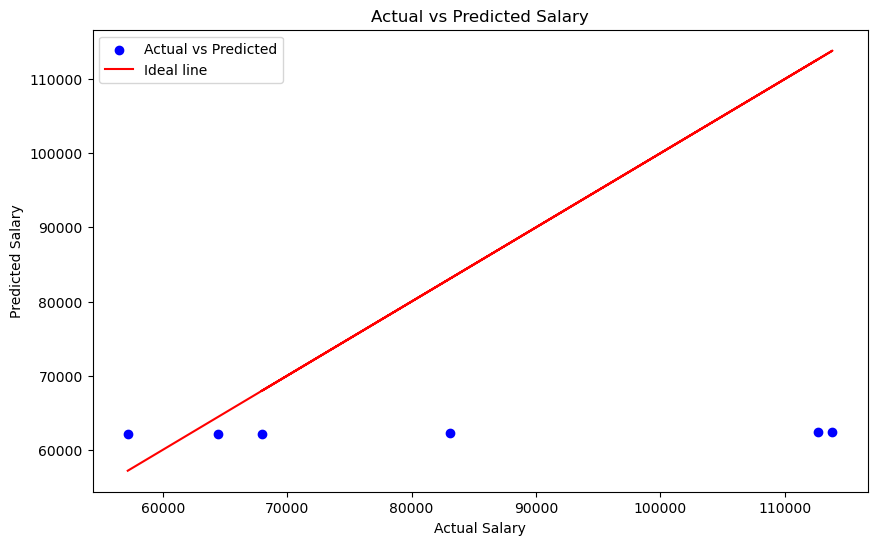

In [16]:
# Plotting actual vs predicted
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')

# Plotting the line of best fit
plt.plot(y_test, y_test, color='red', label='Ideal line')

plt.title('Actual vs Predicted Salary')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.show()


## Universal bank Prediction

To build and train a model using Universal Bank records,and classify the customer is eligible to take Credit Card or not

In [17]:
df = pd.read_csv('UniversalBank.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [18]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [19]:
df.shape

(5000, 14)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [21]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [22]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [23]:
df1 = df.drop(["ID","ZIP Code"], axis = 1)

In [24]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<Axes: title={'center': 'Showing Correlation between all the features'}>

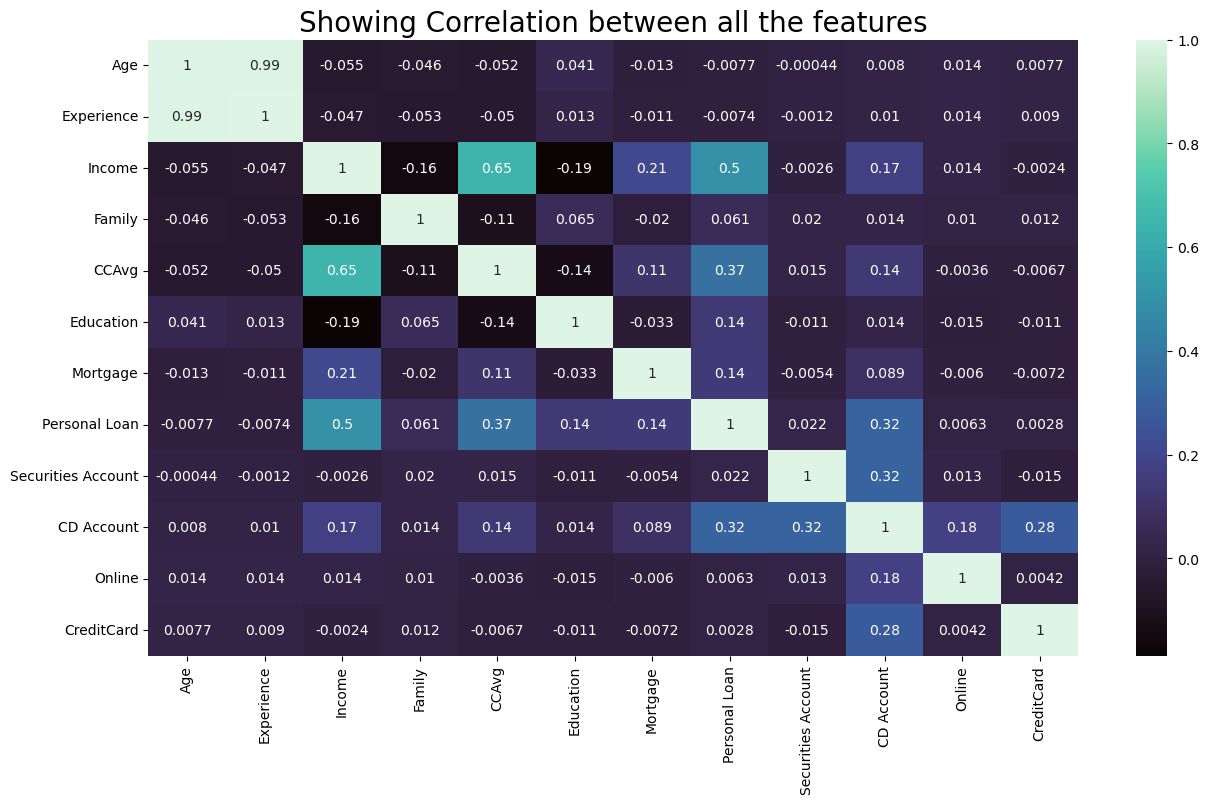

In [25]:
plt.figure(figsize=(15,8))
plt.title("Showing Correlation between all the features", fontsize=20)
sns.heatmap(df1.corr(),annot = True, cmap='mako')


In [26]:
class_0 = df1[df1.CreditCard==0]
class_0.shape

(3530, 12)

In [27]:
class_1 = df1[df1.CreditCard==1]
class_1.shape


(1470, 12)

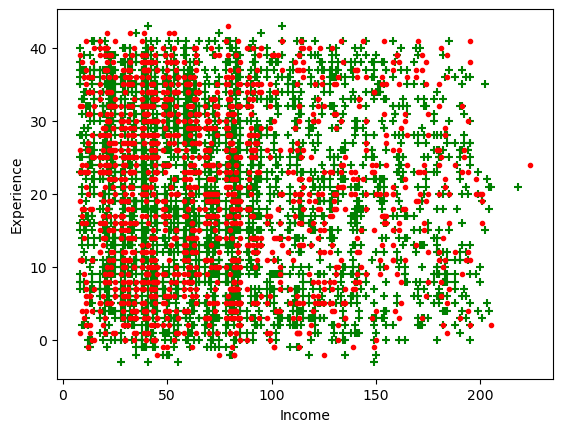

In [28]:
# Income vs Experience scatter plot
plt.xlabel('Income')
plt.ylabel('Experience')
plt.scatter(class_0['Income'],class_0['Experience'], color = 'green',marker='+')
plt.scatter(class_1['Income'], class_1['Experience'], color = 'red', marker='.')

In [29]:
 # Scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(df1.drop('CreditCard',axis=1)).transform(df1.drop('CreditCard',axis=1))
df_scaled = pd.DataFrame(scaled, columns=df1.columns[:-1])
df_scaled.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193371,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250595,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536720,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,-1.216855,0.436103,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536720,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618


In [30]:
# Splitting the columns in to dependent variable (x) and independent variable(y).
x = df_scaled
y = df1['CreditCard']


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [32]:
# Apply SVM Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [33]:
svc=SVC()
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)


In [34]:
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.749


<Axes: >

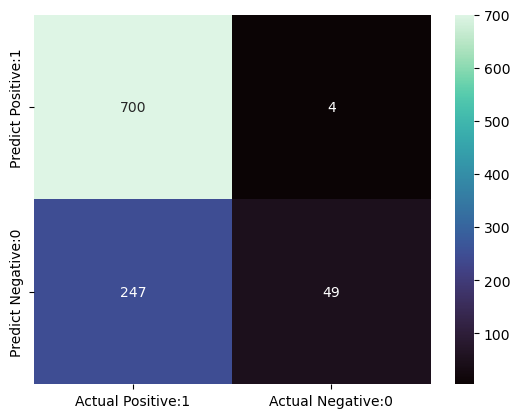

In [35]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')


In [36]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.92      0.17      0.28       296

    accuracy                           0.75      1000
   macro avg       0.83      0.58      0.56      1000
weighted avg       0.79      0.75      0.68      1000



**SVM Kernel Functions**

**Sigmoid Kernel**

In [37]:
# Apply SVM model using Sigmoid Kernel function
Poly_svc=SVC(kernel='sigmoid', C=1).fit(x_train,y_train)
y_pred = Poly_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.629


**Linear Kernel**

In [38]:
# Apply SVM model using Linear Kernel function
linear_classifier=SVC(kernel='linear').fit(x_train,y_train)
y_pred = linear_classifier.predict(x_test)
print('Model accuracy with linear kernel : {0:0.3f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy with linear kernel : 0.747


**Polynomial Kernel**

In [39]:
# Apply SVM model using Polynomial Kernel function
Poly_svc=SVC(kernel='poly', C=1).fit(x_train,y_train)
y_pred = Poly_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.749


**Gaussian RBF kernel**

In [40]:
# Apply SVM model using Gaussian RBF kernel function
rbf_svc=SVC(kernel='rbf').fit(x_train,y_train)
y_pred = rbf_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.749


## House Price Prediction

In [41]:
df=pd.read_csv("boston.csv")

In [42]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [44]:
X = df.drop('MEDV', axis=1)
Y = df['MEDV']

In [45]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [46]:
from sklearn.svm import SVR

In [47]:
svr = SVR(kernel='linear')
svr.fit(x_train, y_train)

SVR(kernel='linear')

In [48]:
y_pred = svr.predict(x_test)

In [49]:
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})


,Actual,Predicted
173,23.6,26.112730
274,32.4,32.551996
491,13.6,15.522970
72,22.8,24.140992
452,16.1,18.499756
...,...,...
412,17.9,-3.169195
436,9.6,13.189656
411,17.2,13.865112
86,22.5,21.442180


In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [51]:
mae = mean_absolute_error(y_test, y_pred)
mae

3.1404227783347185

In [52]:
mse = mean_squared_error(y_test, y_pred)
mse

29.435701924289845

In [53]:
rmse = np.sqrt(mse)
rmse


5.4254678991115455

In [54]:
r2 = r2_score(y_test, y_pred)
r2


0.5986065268181071